###  숫자 인식 

In [18]:
import os
import cv2

In [54]:
TRAIN_FOLDER = "../images/MNIST/trainingSet/"
TEST_FOLDER = "../images/MNIST/testSet/"

In [6]:
folderlist = os.listdir(TRAIN_FOLDER)

In [7]:
IMG_SIZE = 28

In [51]:
train_images = []
train_labels = []

###  폴더 하나씩 이동

In [31]:
import matplotlib.pylab as plt
%matplotlib inline

In [32]:
import pandas as pd

In [52]:
for i in range (0, len(folderlist)):
        path = os.path.join( TRAIN_FOLDER,  folderlist[i])
        imgList = os.listdir(path)
        for j in range(0, len(imgList)):
            try :
                inputimgPath = os.path.join(path, imgList[j])
                gray = cv2.imread(inputimgPath, cv2.IMREAD_GRAYSCALE)
                grayimg = cv2.resize(gray, (IMG_SIZE,IMG_SIZE))
                train_images.append(grayimg)
                train_labels.append(i)
            except Exception as e:
                print(inputimgPath, e)
                pass

../images/MNIST/trainingSet/0_zero\img_0.txt OpenCV(4.1.1) C:\projects\opencv-python\opencv\modules\imgproc\src\resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'



In [57]:
from numpy import array
import numpy as np

In [53]:
print(np.array(train_images).shape)
print(np.array(train_labels).shape)

(42000, 28, 28)
(42000,)


In [55]:
TEST_DIR = '../images/mnist/testSet/'
test_folder_list = os.listdir(TEST_DIR)
test_folder_list

test_images=[]
test_labels=[]
for index in range(0, len(test_folder_list)):
    path = os.path.join(TEST_DIR, test_folder_list[index])
    path = path + '/'
    img_list = os.listdir(path)
    for img in img_list:
        img_path = os.path.join(path, img)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        new_img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        test_images.append(new_img)
        test_labels.append(index)

In [58]:
train_images = array(train_images)
train_labels = array(train_labels)
test_images = array(test_images)
test_labels = array(test_labels)

In [59]:
print('Training data shape : ', train_images.shape, train_labels.shape)
print('Testing data shape : ', test_images.shape, test_labels.shape)

Training data shape :  (42000, 28, 28) (42000,)
Testing data shape :  (200, 28, 28) (200,)


In [60]:
 
# 훈련데이터의 답지분류 범위 정의
classes = np.unique(train_labels)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)
 

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


In [124]:
train_data = train_images.reshape(len(train_images), IMG_SIZE,IMG_SIZE)
test_data = test_images.reshape(len(test_images), IMG_SIZE,IMG_SIZE)

In [125]:
train_data = train_data.astype('float')
test_data = test_data.astype('float')

train_data /= 255
test_data /= 255

In [126]:
train_data[0]

array([[0.01176471, 0.        , 0.        , 0.01176471, 0.02745098,
        0.01176471, 0.        , 0.01176471, 0.        , 0.04313725,
        0.        , 0.        , 0.01176471, 0.        , 0.        ,
        0.01176471, 0.03137255, 0.        , 0.        , 0.01176471,
        0.        , 0.        , 0.        , 0.00784314, 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00392157, 0.01960784, 0.        ,
        0.04705882, 0.        , 0.0627451 , 0.        , 0.        ,
        0.01568627, 0.        , 0.00784314, 0.03137255, 0.01176471,
        0.        , 0.01568627, 0.03137255, 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.00784314, 0.        , 0.        ,
        0.        , 0.00392157, 0.00784314, 0.00392157, 0.04705882,
        0.        , 0.03137255, 0.        , 0.        , 0.02352941,
        0.        , 0.0431

In [127]:
import keras

In [128]:
import os
import cv2
import keras
# 케라스 모델 생성 라이브러리
from keras import models
# 레이어 생성 라이브러리 (Dense: 입출력 연결)
from keras import layers
# 케라스 샘플데이터[mnist] 라이브러리 불러오기
from keras.datasets import mnist
# numpy 라이브러리
import numpy as np
from numpy import array
# 케라스 카테고리 라이브러리
from keras.utils import to_categorical
#from sklearn.preprocessing import LabelEncoder
#from sklearn.preprocessing import OneHotEncoder
# 시각화 라이브러리
import matplotlib.pyplot as plt
%matplotlib inline

In [129]:
from keras.utils import to_categorical

In [130]:
# Change the labels from integer to categorical data
train_labels_one_hot = to_categorical(train_labels)

In [131]:
np.argmax(train_labels_one_hot[41999])

9

In [132]:
# Change the labels from integer to categorical data
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)
 
# Display the change for category label using one-hot encoding
print('Original label 0 : ', train_labels[10000])
print('After conversion to categorical ( one-hot ) : ', train_labels_one_hot[10000])

Original label 0 :  2
After conversion to categorical ( one-hot ) :  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [133]:
from numpy import argmax

In [134]:
# Display the change for category label using one-hot encoding
print('Original label 0 : ', train_labels[2])
print('After conversion to categorical ( one-hot ) : ', train_labels_one_hot[2])

Original label 0 :  0
After conversion to categorical ( one-hot ) :  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [135]:
import keras
from keras import Sequential
from keras.layers import Flatten, Dense

In [136]:
# 입력데이터 형태
modelDim = train_data[0].shape
modelDim

(28, 28)

In [137]:
model = Sequential()

In [138]:
model.add(Flatten(input_shape=modelDim))

In [139]:
model.add(Dense(units=8,activation="relu"))
model.add(Dense(units=8,activation="relu"))
model.add(Dense(units=8,activation="relu"))
model.add(Dense(units=8,activation="relu"))
model.add(Dense(units=8,activation="relu"))
model.add(Dense(units=8,activation="relu"))
model.add(Dense(units=10, activation="softmax"))

In [140]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 8)                 6280      
_________________________________________________________________
dense_25 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_26 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_27 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_28 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_29 (Dense)             (None, 8)                

In [141]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [142]:
from keras.callbacks import EarlyStopping, TensorBoard, ModelCheckpoint

In [150]:
import warnings

In [ ]:
warnings.filterwarnings(action="ignore")

In [153]:
from datetime import datetime

In [163]:
currentdate = datetime.now().strftime("%Y_%m_%d_%H_%M")
currentdate

'2019_10_07_15_30'

In [164]:
callback_list = [
    EarlyStopping(monitor="val_loss", patience=10), 
    TensorBoard(log_dir="./logs_{}".format(currentdate),
            write_images=True, write_graph=True)
    
]

In [165]:
#model.fit(x= train_images, y= train_labels_one_hot, batch_size=32,validation_split=0.2, epochs=4)
model.fit(x= train_data, y= train_labels_one_hot, batch_size=32,validation_data=(test_data,test_labels_one_hot), epochs=4
         ,callbacks = callback_list
         )

Train on 42000 samples, validate on 200 samples
Epoch 1/4
42000/42000 [==============================] - 2s 55us/step - loss: 1.2062 - accuracy: 0.6333 - val_loss: 0.3702 - val_accuracy: 0.9500
Epoch 2/4
42000/42000 [==============================] - 2s 53us/step - loss: 0.4354 - accuracy: 0.8819 - val_loss: 0.2619 - val_accuracy: 0.9300
Epoch 3/4
42000/42000 [==============================] - 2s 53us/step - loss: 0.3552 - accuracy: 0.9026 - val_loss: 0.2435 - val_accuracy: 0.9400
Epoch 4/4
42000/42000 [==============================] - 2s 58us/step - loss: 0.3279 - accuracy: 0.9099 - val_loss: 0.2374 - val_accuracy: 0.9400


In [35]:
inputimg = pd.DataFrame(grayimg)

In [37]:
inputimg.to_csv("D:/train.csv")

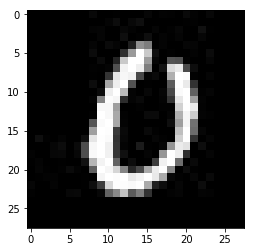

In [34]:
plt.imshow(grayimg, cmap = "gray")